# Cours

OC DS P4 - 4297211 [Evaluez les performances d'un modèle de machine learning](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning)

# 1.3 [TP - Sélectionnez le nombre de voisins dans un kNN](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn)

Précision par rapport au chapitre précédent : il faut bien conserver un jeu de test séparé du reste pour déterminer le meilleur modèle. Le choix du meilleur modèle s'effectue en validation croisée, ou en séparant de celui-ci un jeu de validation. Le jeu de test sert à évaluer la performance en généralisation. Il ne doit donc pas intervenir dans l'apprentissage ni la sélection sous peine de risquer le surapprentissage.

Elle parle de validation croisées imbriquées (nested cross-validation), mais c'est mal expliqué.. <mark>approfondir + tard</mark>

## Chargement

Archives UCI, un des répertoire les + connus de problèmes de machine learning.

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Nouveau site : https://archive-beta.ics.uci.edu/

https://archive-beta.ics.uci.edu/ml/datasets/wine+quality

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
* winequality-red.csv
* winequality-white.csv

In [102]:
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Séparation

In [103]:
X = data[data.columns[:-1]].values       # points
y = data.quality.values                  # étiquettes

# Histogramme pour chaque variables

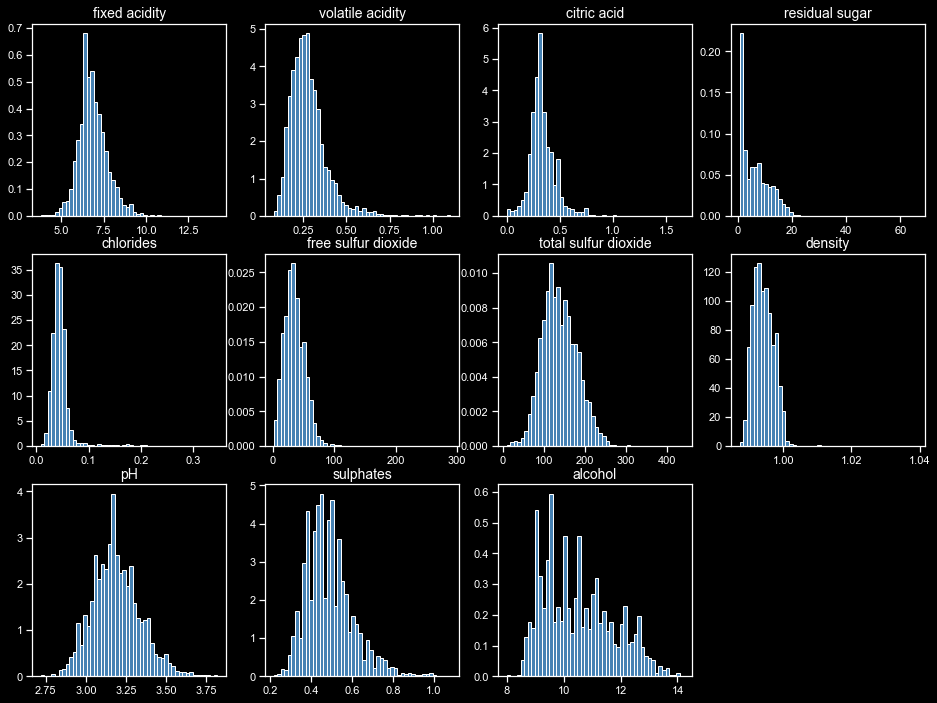

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('dark_background')
f = plt.figure(figsize=(16, 12))
for feat_id in range(X.shape[1]):
    ax = f.add_subplot(3, 4, feat_id + 1)
    h = ax.hist(X[:, feat_id], bins=50, color='steelblue', density=True, edgecolor=None)
    ax.set_title(data.columns[feat_id], fontsize=14)

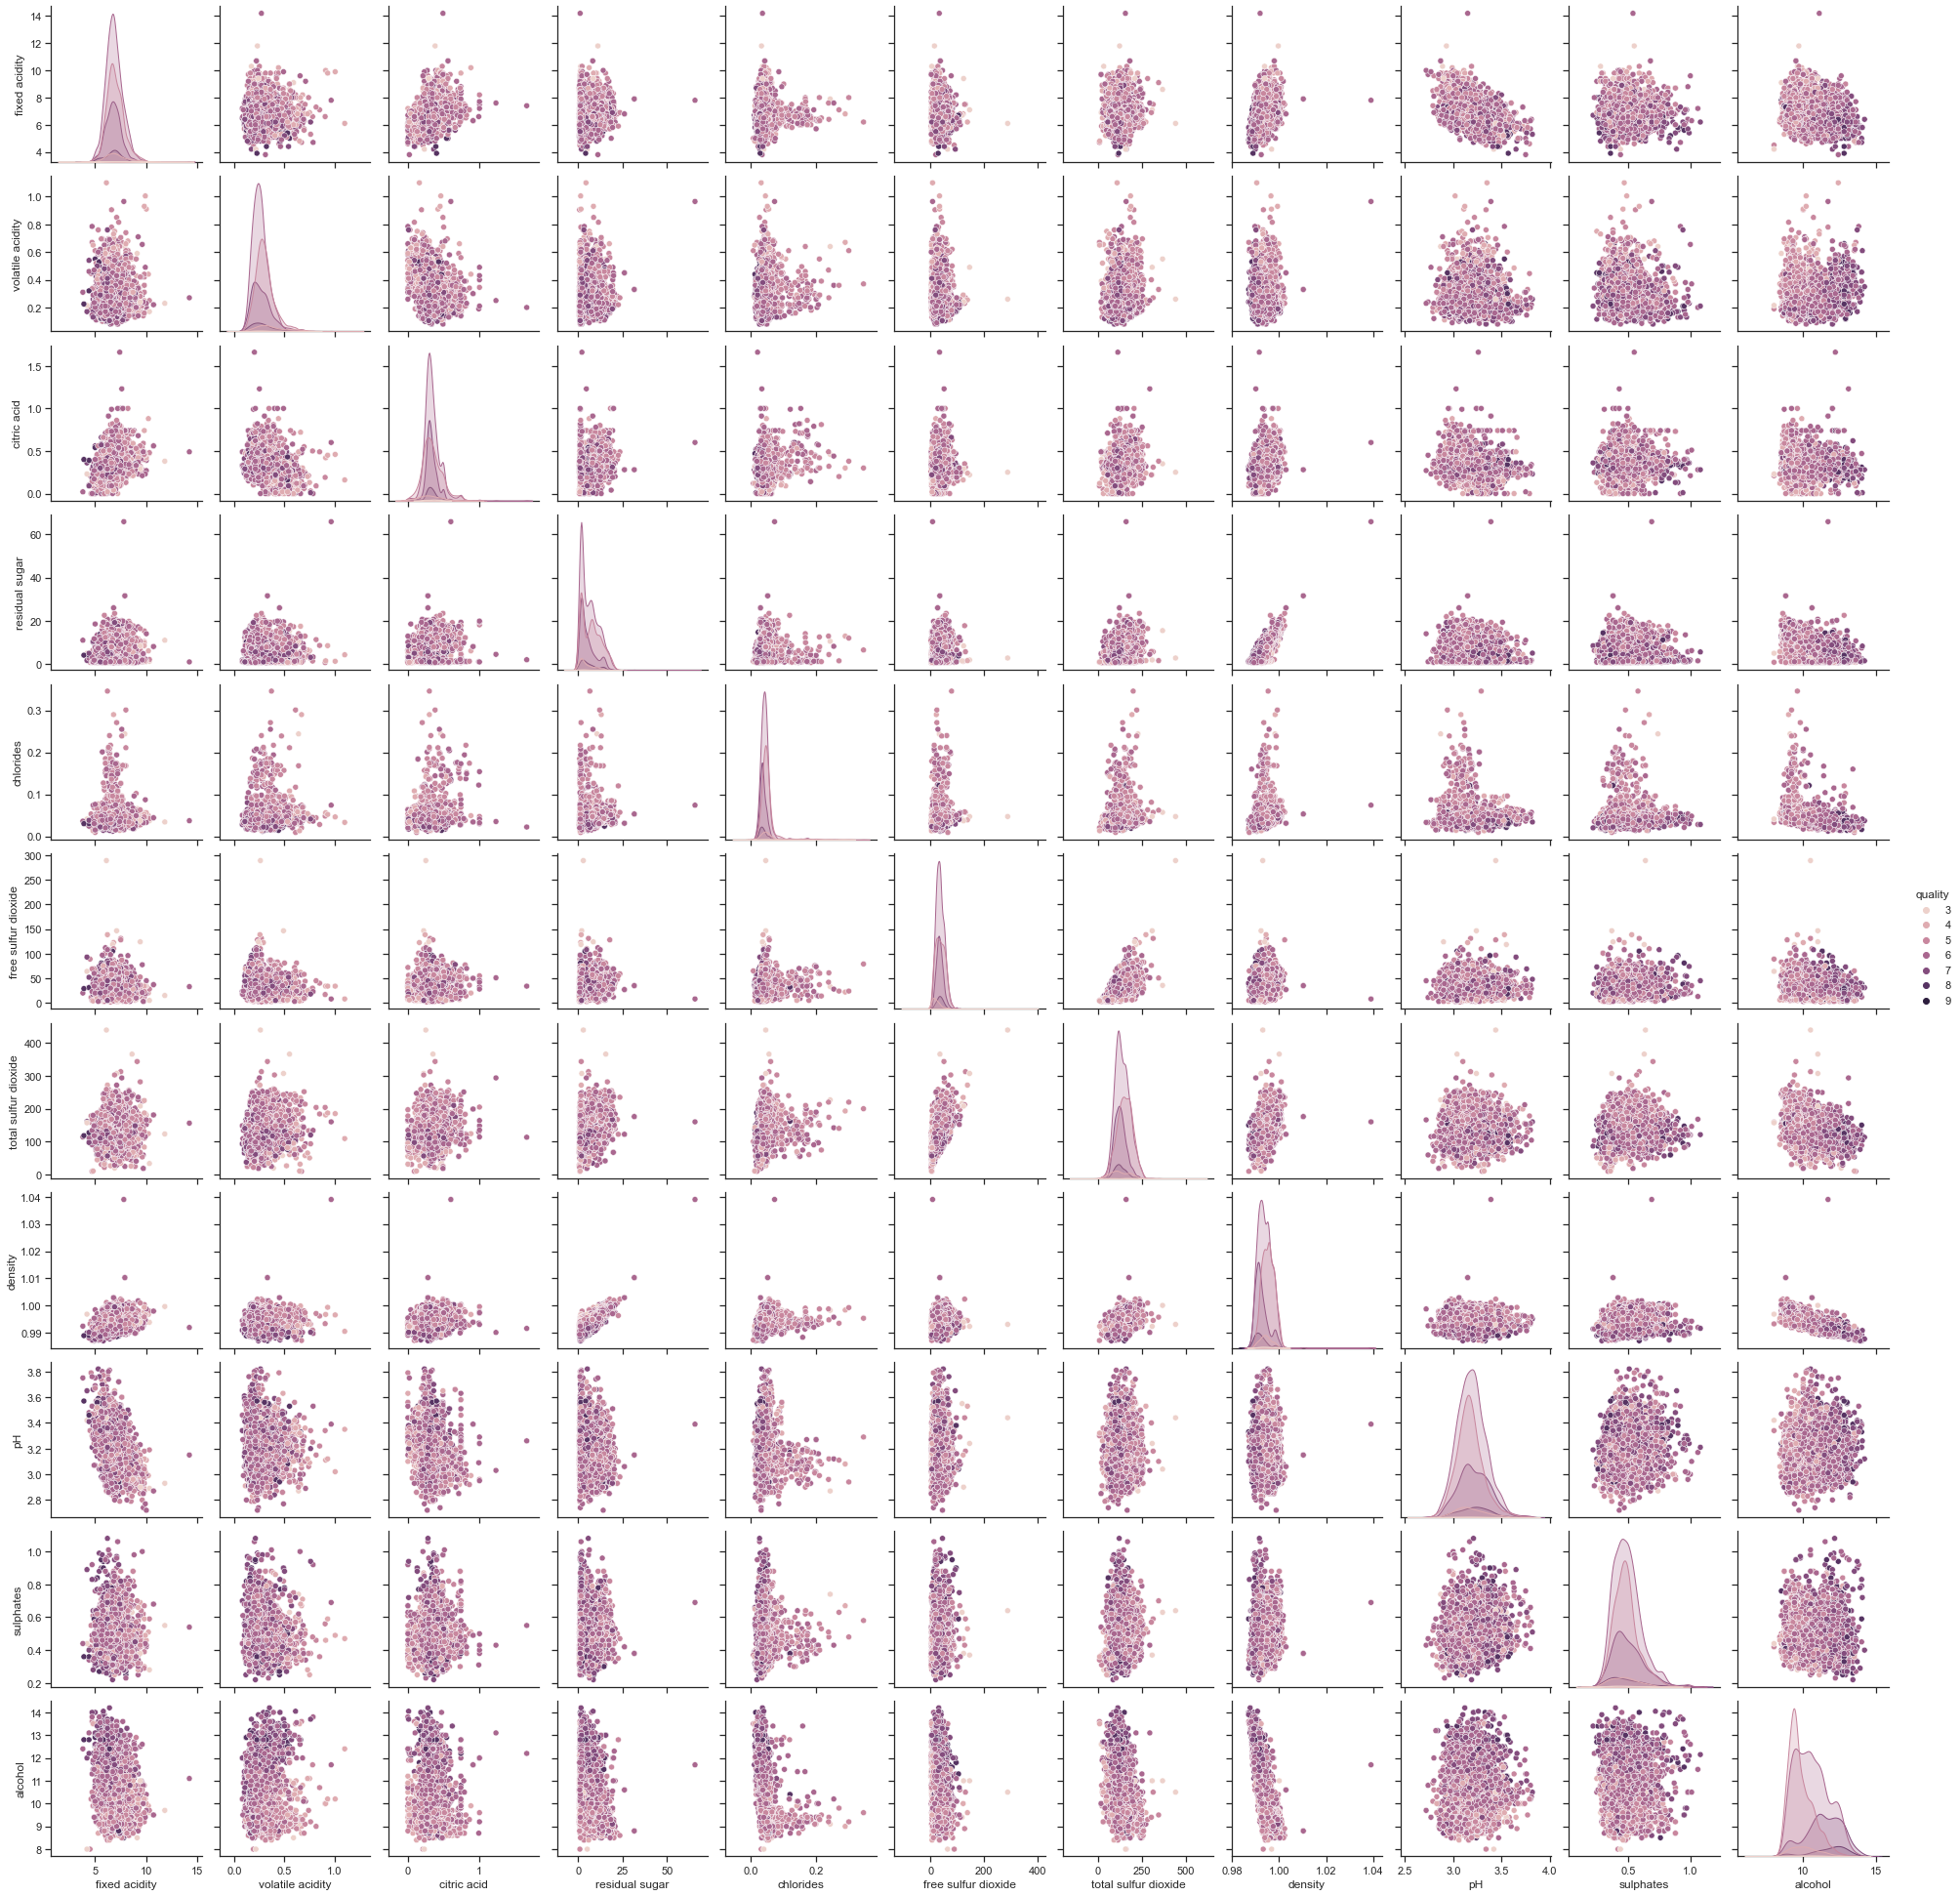

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data, hue='quality')

# Sélection et normalisation

## Séparation : bons vins vs. vins médiocres

Pas expliqué dans le cours : c'est un classifieur, il faut donc que la sortie soit discrète, labels ou entiers.

In [104]:
import numpy as np
y_class = np.where(y < 6, 0, 1)

## Séparation jeu d'entrainement | jeu de test

In [4]:
print(X.shape)
print(y.shape)
print(y_class.shape)

(4898, 11)
(4898,)
(4898,)


In [105]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=.3) # 30 % pour test

## Normalisation (centrage, réduction)

In [106]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

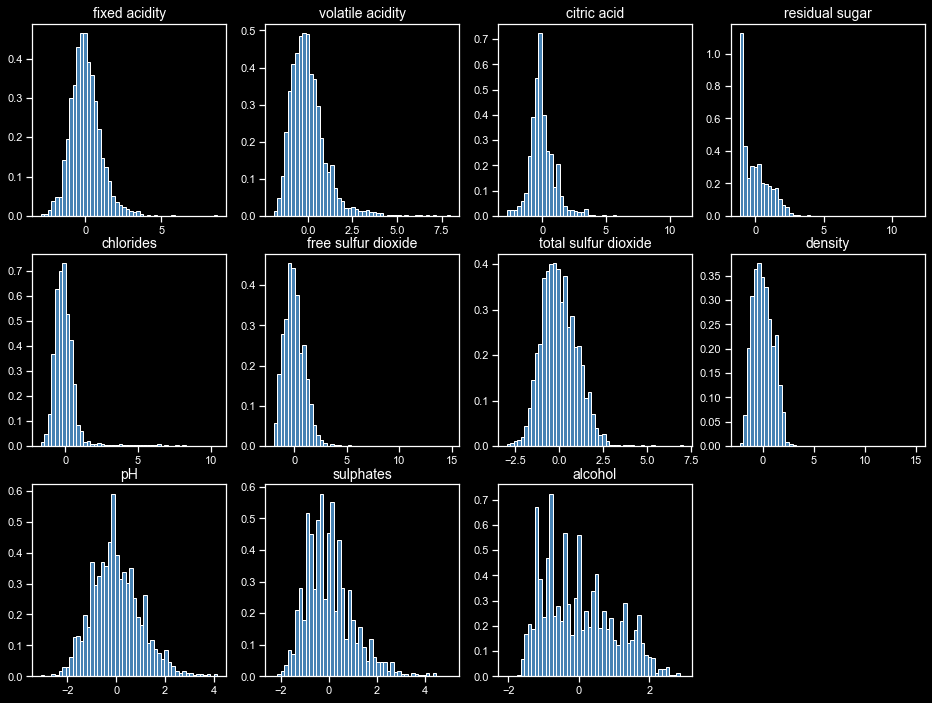

In [23]:
mpl.style.use('dark_background')
f = plt.figure(figsize=(16, 12))
for feat_id in range(X_train_std.shape[1]):
    ax = f.add_subplot(3, 4, feat_id + 1)
    h = ax.hist(X_train_std[:, feat_id], bins=50, color='steelblue', density=True, edgecolor=None)
    ax.set_title(data.columns[feat_id], fontsize=14)

# Validation croisée de l'hyperparamètre k du kNN

In [107]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}   # paramètres testés
score = 'accuracy'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=5,                              # nombre de folds de validation croisée
    scoring=score                      # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(clf.best_params_)

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 11}
Résultats de la validation croisée :
accuracy = 0.721 (+/-0.037) for {'n_neighbors': 2}
accuracy = 0.753 (+/-0.029) for {'n_neighbors': 3}
accuracy = 0.747 (+/-0.038) for {'n_neighbors': 4}
accuracy = 0.758 (+/-0.027) for {'n_neighbors': 5}
accuracy = 0.760 (+/-0.033) for {'n_neighbors': 6}
accuracy = 0.771 (+/-0.025) for {'n_neighbors': 7}
accuracy = 0.765 (+/-0.028) for {'n_neighbors': 8}
accuracy = 0.768 (+/-0.022) for {'n_neighbors': 9}
accuracy = 0.770 (+/-0.039) for {'n_neighbors': 10}
accuracy = 0.772 (+/-0.026) for {'n_neighbors': 11}
accuracy = 0.770 (+/-0.024) for {'n_neighbors': 12}
accuracy = 0.766 (+/-0.014) for {'n_neighbors': 13}
accuracy = 0.768 (+/-0.018) for {'n_neighbors': 14}
accuracy = 0.767 (+/-0.013) for {'n_neighbors': 15}
accuracy = 0.767 (+/-0.015) for {'n_neighbors': 16}
accuracy = 0.765 (+/-0.018) for {'n_neighbors': 17}


In [31]:
y_pred = clf.predict(X_test_std)
print(f'Sur le jeu de test : {metrics.accuracy_score(y_test, y_pred):.3f}')

Sur le jeu de test : 0.788


# 2.2 ROC

Text(0, 0.5, 'Sensibilite')

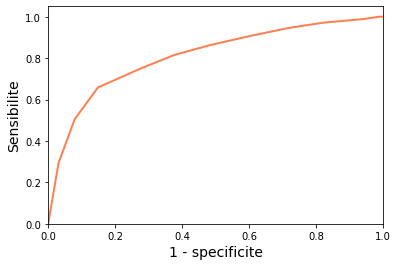

In [108]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [109]:
print(metrics.auc(fpr, tpr))

0.8097135354935177


Sensibilité : 0.97
Spécificité : 0.18
Seuil : 0.27


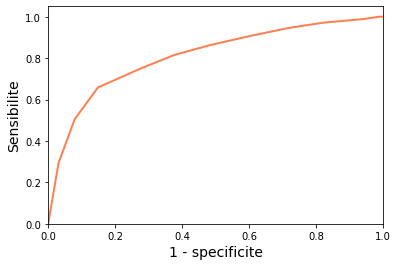

In [110]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

# 3.1 Évaluez un algorithme de régression
## Du RSS au RMSLE

Somme des carrés des résidus = **RSS** (*Residual Sum of Squares*) = $\sum_{i=1}^n{(f(x_i)-y_i)^2}$

Pb : proportionnelle à la taille du jeu de données  ⇒ besoin de normaliser :

Erreur quadratique moyenne = **MSE** (*Mean Squared Error*) = $\frac{1}{n}\sum_{i=1}^n{(f(x_i)-y_i)^2}$

Problème : est au carré de l’unité de y ⇒ besoin de normaliser.

Racine de l’erreur quadratique moyenne = **RMSE** (*Root Mean Squared Error*) $\sqrt{\frac{1}{n}\sum_{i=1}^n{(f(x_i)-y_i)^2}}$

Racine de l’erreur logarithmique quadratique moyenne = **RMSLE** (*Root Mean Squared Log Error*)

$\sqrt{\frac{1}{n}\sum_{i=1}^n{(\log(f(x_i)+1)-\log(y_i+1))^2}}$

## Erreur carrée relative, coefficient de détermination et corrélation de Pearson

L’idée est de relativiser l’erreur par rapport aux distances à la moyenne (et pourquoi pas la médiane ?)

Avec la moyene $\bar{y}=\frac{1}{n}\sum_{i=1}^n{y_i}$

$RSE=\frac{\sum_{i=1}^n{(f(x_i)-y_i)^2}}{\sum_{i=1}^n{(y_i-\bar{y})^2}}$


Erreur carrée relative = **RSE** (*Relative Squared Error*)

$R^2 = 1 - RSE$ : **coefficient de détermination** = carré de la **corrélation de Pearson**.

Proche de 1, corrélation forte, proche de 0 corrélation faible.

Attention : c'est un carré : proche de 1 également pour des valeurs anti-corrélées !

## Application avec SKL

Comparaison d'un kNN avec des approches naïves (aléatoire et moyenne (ou médiane))

Reprenons notre jeu de données sur le vinho verde blanc.
Comme les étiquettes sont des nombres entiers, nous pouvons traiter la prédiction de la note de chaque vin à partir de ses caractéristiques physico-chimiques comme un problème de régression.

Commençons par charger les données :

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('winequality-white.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

Séparons nos données en un jeu de test et un jeu d'entraînement :

In [2]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 )

Normalisation

In [4]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

Entraînons un kNN avec k=11 sur ces données :

In [15]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

Et appliquons le pour prédire les étiquettes de notre jeu de test :

In [16]:
y_pred = knn.predict(X_test_std)

Calculons la RMSE correspondante :

In [17]:
from sklearn import metrics
print(f'RMSE : {np.sqrt( metrics.mean_squared_error(y_test, y_pred)):.2f}')

RMSE : 0.76


J'obtiens une RMSE de 0.83. Nos étiquettes étant des nombres entiers, nous faisons en moyenne une erreur inférieure à la plus petite différence possible entre deux notes.

Nous pouvons visualiser les résultats sur un graphique, en représentant en abscisse les vraies valeurs des étiquettes, et en ordonnée les valeurs prédites.

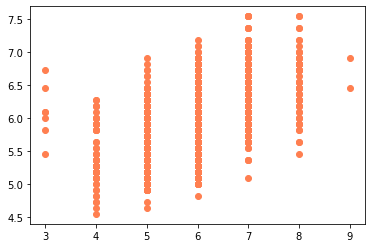

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='coral')

Comme nos étiquettes prennent des valeurs entières entre 3 et 8, nous avons beaucoup de points superposés aux même coordonnées. Pour mieux visualiser les données, nous pouvons utiliser comme marqueurs des cercles dont la taille est proportionnelle au nombre de points qui sont présents à ces coordonnées.

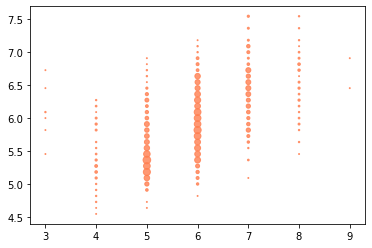

In [11]:
# TODO : P4 : technique à réutiliser sur mes graphiques d'analyse bivariée

sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)

On note ainsi une accumulation de prédictions correctes sur la diagonale. Néanmoins le modèle n'est pas très précis dans ses prédictions.

Pour mieux comprendre notre modèle, comparons-le à une première approche naïve, qui consiste à prédire des valeurs aléatoires, distribuées uniformément entre les valeurs basse et haute des étiquettes du jeu de données d'entraînement.

In [12]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

Calculons la RMSE correspondante :

In [13]:
print(f'RMSE : {np.sqrt( metrics.mean_squared_error(y_test, y_pred_random)):.2f}')

RMSE : 1.93


J'obtiens une RMSE de 1.93, ce qui est bien supérieur à la RMSE obtenue par notre modèle kNN. Notre modèle a ainsi réussi à bien mieux apprendre qu'un modèle aléatoire.

Cependant, beaucoup de nos vins ont une note de 6, et beaucoup de nos prédictions sont autour de cette valeur. Comparons maintenant notre modèle à un modèle aléatoire qui retourne systématiquement la valeur moyenne des étiquettes du jeu de données d'entraînement.

Nous pouvons utiliser pour cela la fonction correspondante du module "dummy" de scikit-learn.

In [14]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Evaluate
print(f'RMSE : {np.sqrt( metrics.mean_squared_error(y_test, y_pred_dum)):.2f}')

RMSE : 0.93


J'obtiens une RMSE de 0.91, qui est supérieure à celle de 0.83 obtenue par le kNN. Le kNN a donc appris plus que la moyenne des étiquettes…

En fait, l'algorithme des k plus proches voisins ne donne pas de très bons modèles sur ce problème, mais a l'avantage d'être assez simple à comprendre.

# TP de synthèse

[Entraînez-vous : sélectionnez le nombre de voisins dans un kNN pour une régression](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/6737946-entrainez-vous-selectionnez-le-nombre-de-voisins-dans-un-knn-pour-une-regression)

**Votre mission**

Dans cette activité, vous utiliserez la version régression du K-nn afin de prédire la qualité du vin. Vous évaluerez votre modèle à l’aide des méthodes étudiées dans cette partie pour **optimiser votre algorithme** et **choisir les meilleurs hyper-paramètres** (le nombre de voisins), à nouveau à l’aide d’une grid search, à implémenter vous même. 

**Objectif**

Dans cette activité, vous devez **optimiser l’erreur quadratique moyenne** (*Mean Squared Error*, MSE). Vous pourrez observer le comportement de la MSE et la comparer à celui de $R^2$.

Vous comparerez les performances à l’aide d’une baseline naïve ainsi que les différentes heuristiques, comme effectué dans le TP précédent.  Pour cela, vous utiliserez cette fois le second dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

À l'issue de votre mission, vous aurez créé un classeur iPython où vous interpréterez les valeurs des différentes heuristiques utilisées ainsi que le choix final.

À vous de jouer !

## Chargement des données

In [18]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Séparation features / target

In [19]:
X = red_wine[red_wine.columns[:-1]].values       # points
y = red_wine.quality.values                      # étiquettes

## Binarisation de la target

In [20]:
import numpy as np
y_class = np.where(y < 6, 0, 1)

## Séparation des jeux d'entraînement / test

In [21]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=.3) # 30 % pour test

## Normalisation

In [22]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Version régression du kNN

[module sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors):
* [neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)([n_neighbors, ...]) Regression based on k-nearest neighbors.
* [neighbors.kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph)(X, n_neighbors, *) Compute the (weighted) graph of k-Neighbors for points in X.

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

## Prédiction et performance

In [25]:
y_pred = knn.predict(X_test_std)

## Mesure de la performance

[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) :
* [metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)(y_true, y_pred, *) Mean squared error regression loss.
* [metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)(y_true, y_pred, *[, ...])  $R^2$ (coefficient of determination) regression score function.

### MSE

Erreur quadratique moyenne = **MSE** (*Mean Squared Error*) = $\frac{1}{n}\sum_{i=1}^n{(f(x_i)-y_i)^2}$

In [26]:
from sklearn import metrics
print(f'RMSE : {metrics.mean_squared_error(y_test, y_pred):.2f}')

RMSE : 0.19


### $R^2$

L’idée est de relativiser l’erreur par rapport aux distances à la moyenne (et pourquoi pas la médiane ?)

Avec la moyene $\bar{y}=\frac{1}{n}\sum_{i=1}^n{y_i}$

$RSE=\frac{\sum_{i=1}^n{(f(x_i)-y_i)^2}}{\sum_{i=1}^n{(y_i-\bar{y})^2}}$

Erreur carrée relative = **RSE** (*Relative Squared Error*)

$R^2 = 1 - RSE$ : **coefficient de détermination** = carré de la **corrélation de Pearson**.

Proche de 1, corrélation forte, proche de 0 corrélation faible.

Attention : c'est un carré : proche de 1 également pour des valeurs anti-corrélées !

In [31]:
from sklearn import metrics
print(f'R2 : {metrics.r2_score(y_test, y_pred):.2f}')

R2 : 0.22


## Comparaison avec une baseline (dummy generator)

In [34]:
from sklearn import dummy

def dummy_eval(X_train, y_train, X_test, y_test):
    # Baselines (dummy strategies)
    dummies = {
        'mean': dummy.DummyRegressor(strategy='mean'),
        'median': dummy.DummyRegressor(strategy='median'),
        'quantile': dummy.DummyRegressor(strategy='quantile', quantile=.6),
        'constant': dummy.DummyRegressor(strategy='constant', constant=6)
    }

    # Trainings
    for d in dummies.values():
        d.fit(X_train, y_train)

    # Predictions
    y_pred = {}
    for k, d in dummies.items():
        y_pred[k] = d.predict(X_test)

    # Performances measures
    perfs = {}
    for k, y_pred in y_pred.items():
        perfs[k] = {
            'RMSE': metrics.mean_squared_error(y_test, y_pred),
            'R2': metrics.r2_score(y_test, y_pred)
        }

    # Print
    for k, perf in perfs.items():
        print(k, 'performances :')
        print('\tRMSE :', round(perf['RMSE'], 2))
        print('\tR2   :', round(perf['R2'], 2))

dummy_eval(X_train_std, y_train, X_test_std, y_test)

mean performances :
	RMSE : 0.25
	R2   : -0.0
median performances :
	RMSE : 0.45
	R2   : -0.82
quantile performances :
	RMSE : 0.45
	R2   : -0.82
constant performances :
	RMSE : 29.95
	R2   : -120.01


## Grid Search (Sklearn)

In [52]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}   # paramètres testés
score = 'neg_mean_squared_error', 'r2'    # le score que l'on cherche à optimiser : ici la proportion de prédictions ok

# classifieur kNN avec recherche d'hyperparamètre par validation croisée
gs = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),  # un classifieur kNN
    param_grid,                        # hyperparamètres à tester
    cv=10,                              # nombre de folds de validation croisée
    scoring=score,                      # score à optimiser
    refit='r2'
)

# Optimiser ce classifieur sur le jeu d'entraînement
gs.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print('Meilleur(s) hyperparamètre(s) sur le jeu d\'entraînement:')
print(gs.best_params_)
cv_res = pd.DataFrame.from_dict(gs.cv_results_)
print('best param mean r2 :', round(cv_res.mean_test_r2[cv_res.rank_test_r2 == 1].values[0], 2))

# Afficher les performances correspondantes
print('Résultats de la validation croisée :')
"""for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  # score moyen
        clf.cv_results_['std_test_score'],   # écart-type du score
        clf.cv_results_['params']            # valeur de l'hyperparamètre
    ):
    print(f'{score} = {mean:.3f} (+/-{std * 2:.03f}) for {params}')"""
#for k, v in clf.cv_results_.items():
#    print(k, v)
display(cv_res)
#return gs.cv_results_

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 12}
best param mean r2 : 0.3
Résultats de la validation croisée :


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001390,0.000485,0.002921,0.000549,2,{'n_neighbors': 2},-0.200893,-0.203125,-0.245536,-0.243304,...,0.021795,0.197917,0.117968,0.165533,0.204342,0.075641,0.196568,0.135186,0.071030,16
1,0.001601,0.000477,0.003199,0.000600,3,{'n_neighbors': 3},-0.187500,-0.202381,-0.230159,-0.245040,...,0.014815,0.287037,0.147970,0.217939,0.284802,0.146439,0.265777,0.185552,0.087765,15
2,0.001203,0.000388,0.003294,0.000446,4,{'n_neighbors': 4},-0.189174,-0.201451,-0.219308,-0.237165,...,0.046474,0.254883,0.178721,0.247166,0.273627,0.145192,0.318437,0.199611,0.078362,14
3,0.001102,0.000312,0.003294,0.000455,5,{'n_neighbors': 5},-0.190714,-0.200357,-0.208571,-0.225714,...,0.092513,0.292708,0.182051,0.296145,0.287663,0.194462,0.337033,0.225581,0.072952,13
4,0.001410,0.000504,0.003086,0.000305,6,{'n_neighbors': 6},-0.192212,-0.196925,-0.217510,-0.204117,...,0.179345,0.263744,0.192971,0.321744,0.292749,0.170370,0.342008,0.230822,0.068169,12
5,0.001606,0.000487,0.002997,0.000026,7,{'n_neighbors': 7},-0.194060,-0.190415,-0.204446,-0.199708,...,0.197070,0.301339,0.230748,0.332871,0.292830,0.161172,0.377299,0.251063,0.067705,11
6,0.001203,0.000389,0.003505,0.000674,8,{'n_neighbors': 8},-0.180664,-0.174944,-0.201172,-0.201311,...,0.190625,0.327799,0.225410,0.354875,0.304917,0.185016,0.425636,0.276191,0.076083,10
7,0.002100,0.001134,0.004699,0.001553,9,{'n_neighbors': 9},-0.176918,-0.168761,-0.201830,-0.202381,...,0.186325,0.328897,0.240417,0.359033,0.317030,0.217347,0.411552,0.284595,0.071448,6
8,0.001204,0.000407,0.003800,0.000401,10,{'n_neighbors': 10},-0.168750,-0.175268,-0.190714,-0.202589,...,0.185487,0.318594,0.255133,0.341859,0.314840,0.232513,0.410696,0.289526,0.062382,4
9,0.001301,0.000465,0.003397,0.000484,11,{'n_neighbors': 11},-0.162928,-0.177391,-0.185581,-0.202184,...,0.187116,0.322658,0.252899,0.335545,0.321449,0.230727,0.402555,0.292436,0.061148,2
